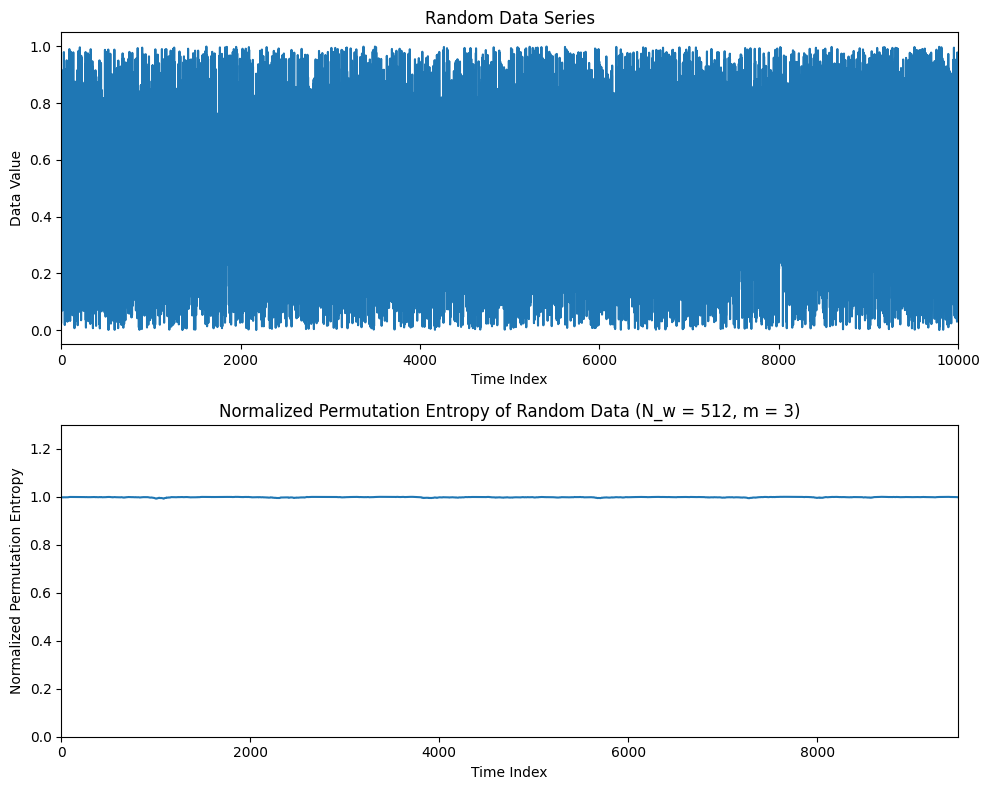

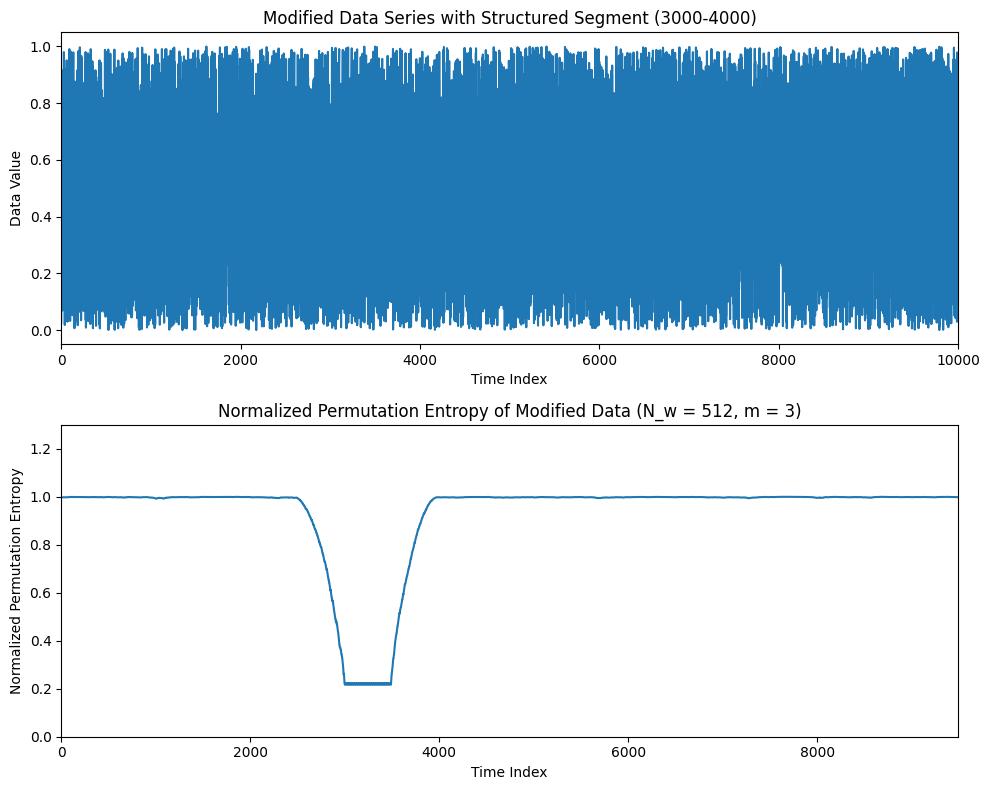

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math  

# Function to calculate Shannon entropy manually
def shannon_entropy(prob):
    return -np.sum(prob * np.log2(prob))

# Function to calculate normalized permutation entropy
def normalized_permutation_entropy(data, order, window_size):
    n = len(data)
    perm_entropy = np.zeros(n - window_size + 1)

    # Iterate over the sliding window
    for i in range(n - window_size + 1):
        window_data = data[i:i + window_size]

        # Generate all permutations of the given order
        perms = []
        for j in range(window_size - order + 1):
            sorted_idx_tuple = tuple(np.argsort(window_data[j:j + order]))
            perms.append(sorted_idx_tuple)
        
        # Count occurrences of each permutation
        unique_perms, counts = np.unique(perms, return_counts=True, axis=0)
        
        # Calculate probabilities of each permutation
        prob = counts / counts.sum()
        
        # Compute Shannon entropy (unnormalized)
        H = shannon_entropy(prob)
        
        # Normalize the entropy by dividing by log2(m!)
        max_entropy = np.log2(math.factorial(order))
        perm_entropy[i] = H / max_entropy
    
    return perm_entropy

# Parameters
data_length = 10000
N_w = 512  # Sliding window size
m = 3  # Permutation order

# Generate random data series
random_data = np.random.rand(data_length)

# Plot the random data and its normalized permutation entropy
random_pe = normalized_permutation_entropy(random_data, m, N_w)
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(np.arange(data_length), random_data, label="Random Data")
plt.title('Random Data Series')
plt.xlabel('Time Index')
plt.ylabel('Data Value')
plt.xlim([0, data_length])  

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(random_pe)), random_pe, label="Normalized Permutation Entropy")
plt.title('Normalized Permutation Entropy of Random Data (N_w = 512, m = 3)')
plt.xlabel('Time Index')
plt.ylabel('Normalized Permutation Entropy')
plt.ylim([0, 1.3])
plt.xlim([0, len(random_pe)])  

plt.tight_layout()
plt.show()

# Modify data between indices 3000 and 4000
segment_start = 3000
segment_end = 4000

# Introduce subtle structure in the range [3000, 4000] by partially sorting small sections of data
chunk_size = 20  # We can use Smaller chunk size for more subtle changes
for i in range(segment_start, segment_end, chunk_size):
    end_index = min(i + chunk_size, segment_end)
    
    # Sort the chunk to introduce a certain level of order
    partial_data = np.sort(random_data[i:end_index])
    
    # Assign modified chunk back to the original data
    random_data[i:end_index] = partial_data

# Calculate normalized permutation entropy for modified data
modified_pe = normalized_permutation_entropy(random_data, m, N_w)

# Plot the modified data and its normalized permutation entropy
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(np.arange(data_length), random_data, label="Modified Data with Structured Segment")
plt.title('Modified Data Series with Structured Segment (3000-4000)')
plt.xlabel('Time Index')
plt.ylabel('Data Value')
plt.xlim([0, data_length])  

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(modified_pe)), modified_pe, label="Normalized Permutation Entropy")
plt.title('Normalized Permutation Entropy of Modified Data (N_w = 512, m = 3)')
plt.xlabel('Time Index')
plt.ylabel('Normalized Permutation Entropy')
plt.ylim([0, 1.3])
plt.xlim([0, len(modified_pe)])  

plt.tight_layout()
plt.show()

